#Data Preprocessing

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch
import torch.nn as nn
from torch import optim
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook


In [0]:
df = pd.read_csv('Train_1.txt', sep = ',', names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"])

df_test = pd.read_csv('Test_1.txt', sep = ',', names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"])

In [0]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,intrusion,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [0]:
df.groupby(['protocol_type']).describe()


duration                                                        \
                  count        mean          std  min  25%  50%  75%      max   
protocol_type                                                                   
icmp             8291.0    0.000000     0.000000  0.0  0.0  0.0  0.0      0.0   
tcp            102689.0  281.386419  2776.679452  0.0  0.0  0.0  0.0  42908.0   
udp             14993.0  485.372040  2025.973457  0.0  0.0  0.0  0.0  29505.0   

              src_bytes                ... dst_host_srv_rerror_rate       \
                  count          mean  ...                      75%  max   
protocol_type                          ...                                 
icmp             8291.0    342.577976  ...                      0.0  0.0   
tcp            102689.0  55860.741861  ...                      0.0  1.0   
udp             14993.0     70.384913  ...                      0.0  0.0   

              last_flag                                                    
                  count       mean       std  min   25%   50%   75%   max  
protocol_type                                                              
icmp             8291.0  17.089495  2.117125  0.0  16.0  17.0  18.0  21.0  
tcp            102689.0  19.794691  2.185327  0.0  19.0  21.0  21.0  21.0  
udp             14993.0  18.848729  2.168018  1.0  18.0  18.0  21.0  21.0  

[3 rows x 312 columns]

In [0]:
df.loc[df['protocol_type'] == 'icmp', "protocol_type"] = 3
df.loc[df['protocol_type'] == 'tcp', "protocol_type"] = 1
df.loc[df['protocol_type'] == 'udp', "protocol_type"] = 2

In [0]:
df_test.loc[df_test['protocol_type'] == 'icmp', "protocol_type"] = 3
df_test.loc[df_test['protocol_type'] == 'tcp', "protocol_type"] = 1
df_test.loc[df_test['protocol_type'] == 'udp', "protocol_type"] = 2

In [0]:
df_test.groupby(['attack']).describe()

duration                                               \
                   count        mean          std  min  25%  50%  75%   
attack                                                                  
iintrusionweep     141.0    0.000000     0.000000  0.0  0.0  0.0  0.0   
intrusion        12690.0  352.787864  1545.542527  0.0  0.0  0.0  0.0   
normal            9711.0   47.068376  1192.455478  0.0  0.0  0.0  0.0   
udintrusiontorm      2.0    0.000000     0.000000  0.0  0.0  0.0  0.0   

                         src_bytes                ...  \
                     max     count          mean  ...   
attack                                            ...   
iintrusionweep       0.0     141.0     14.737589  ...   
intrusion        57715.0   12690.0  16531.059496  ...   
normal           54451.0    9711.0   2530.512512  ...   
udintrusiontorm      0.0       2.0      0.000000  ...   

                dst_host_srv_rerror_rate      last_flag                       \
                                     75%  max     count       mean       std   
attack                                                                         
iintrusionweep                       0.0  0.0     141.0  16.617021  1.597586   
intrusion                            1.0  1.0   12690.0  16.547281  4.583497   
normal                               0.0  1.0    9711.0  19.961178  2.864685   
udintrusiontorm                      0.0  0.0       2.0  13.000000  5.656854   

                                              
                 min   25%   50%   75%   max  
attack                                        
iintrusionweep   8.0  16.0  17.0  18.0  18.0  
intrusion        0.0  14.0  18.0  20.0  21.0  
normal           0.0  21.0  21.0  21.0  21.0  
udintrusiontorm  9.0  11.0  13.0  15.0  17.0  

[4 rows x 312 columns]

In [0]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,1,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,2,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,1,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,intrusion,19
3,0,1,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,1,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [0]:
df_test.groupby(['service']).describe()

duration                                                           \
               count         mean           std  min      25%     50%     75%   
service                                                                         
IRC             13.0  4248.538462   2924.972553  0.0  2927.00  4560.0  5566.0   
X11             15.0  6217.466667  15478.810996  0.0   105.00   277.0   586.0   
Z39_50          45.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
auth            67.0     0.044776      0.271519  0.0     0.00     0.0     0.0   
bgp             46.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
courier         40.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
csnet_ns        34.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
ctf             41.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
daytime         28.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
discard         26.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
domain          51.0    49.137255    199.745440  0.0     0.00     0.0     0.0   
domain_u       894.0     4.579418    124.025057  0.0     0.00     0.0     0.0   
echo            37.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
eco_i          262.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
ecr_i          752.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
efs             33.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
exec            27.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
finger         136.0     0.022059      0.147418  0.0     0.00     0.0     0.0   
ftp            692.0   205.715318    125.867392  0.0    26.75   282.0   282.0   
ftp_data       851.0    72.985899    122.796033  0.0     0.00     0.0   280.0   
gopher          34.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
hostnames       23.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
http          7853.0    74.973131    320.095431  0.0     0.00     0.0     0.0   
http_443        36.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
intrusion4     306.0     0.950980      5.381896  0.0     0.00     0.0     0.0   
iso_tsap        48.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
klogin          21.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
kshell          24.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
ldap            19.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
link            41.0     0.073171      0.468521  0.0     0.00     0.0     0.0   
...              ...          ...           ...  ...      ...     ...     ...   
netbios_ns      36.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
netbios_ssn     15.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
netstat         26.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
nnsp            42.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
nntp            21.0     0.238095      1.091089  0.0     0.00     0.0     0.0   
ntp_u           10.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
other          838.0    59.151551    779.036756  0.0     0.00     0.0     0.0   
pm_dump         16.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
pop_2           13.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
pop_3         1019.0     3.206084      2.151602  0.0     1.00     4.0     4.0   
printer         11.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
private       4774.0     0.050691      2.973792  0.0     0.00     0.0     0.0   
remote_job      14.0     0.214286      0.801784  0.0     0.00     0.0     0.0   
rje              8.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
shell           16.0     0.250000      1.000000  0.0     0.00     0.0     0.0   
smtp           934.0    88.049251   1884.35

In [0]:
df = df.drop('service', axis = 1)
df_test = df_test.drop('service', axis = 1)

In [0]:
df.groupby(['flag']).describe()


duration                                                                \
          count          mean           std  min  25%   50%      75%      max   
flag                                                                            
OTH        46.0      0.000000      0.000000  0.0  0.0   0.0      0.0      0.0   
REJ     11233.0      0.020475      0.377342  0.0  0.0   0.0      0.0     23.0   
RSTO     1562.0    163.108835   1643.879376  0.0  0.0   0.0      0.0  40504.0   
RSTOS0    103.0   3407.174757  10500.314823  1.0  1.0   1.0      1.0  38621.0   
RSTR     2421.0  10333.520446  14200.957342  0.0  0.0  15.0  18418.0  42908.0   
S0      34851.0      0.000000      0.000000  0.0  0.0   0.0      0.0      0.0   
S1        365.0      0.000000      0.000000  0.0  0.0   0.0      0.0      0.0   
S2        127.0      7.511811     42.143531  0.0  0.0   0.0      0.0    410.0   
S3         49.0    438.755102   1916.306849  0.0  0.0   0.0      2.0  12005.0   
SF      74945.0    140.457963   1155.123553  0.0  0.0   0.0      0.0  32637.0   
SH        271.0      0.000000      0.000000  0.0  0.0   0.0      0.0      0.0   

       protocol_type            ... dst_host_srv_rerror_rate       last_flag  \
               count      mean  ...                      75%   max     count   
flag                            ...                                            
OTH             46.0  1.000000  ...                      0.0  0.00      46.0   
REJ          11233.0  1.000000  ...                      1.0  1.00   11233.0   
RSTO          1562.0  1.000000  ...                      1.0  1.00    1562.0   
RSTOS0         103.0  1.000000  ...                      0.5  1.00     103.0   
RSTR          2421.0  1.000000  ...                      1.0  1.00    2421.0   
S0           34851.0  1.000000  ...                      0.0  1.00   34851.0   
S1             365.0  1.000000  ...                      0.0  1.00     365.0   
S2             127.0  1.000000  ...                      0.0  0.97     127.0   
S3              49.0  1.000000  ...                      0.0  0.91      49.0   
SF           74945.0  1.421309  ...                      0.0  1.00   74945.0   
SH             271.0  1.000000  ...                      0.0  0.05     271.0   

                                                           
             mean       std   min   25%   50%   75%   max  
flag                                                       
OTH     12.826087  3.957015   1.0  11.0  12.0  14.0  20.0  
REJ     19.602867  1.677512   5.0  19.0  20.0  21.0  21.0  
RSTO    18.595391  3.089555   3.0  18.0  20.0  20.0  21.0  
RSTOS0  18.504854  3.691203   2.0  20.0  20.0  20.0  21.0  
RSTR    15.652623  2.426341   3.0  15.0  15.0  18.0  21.0  
S0      19.597773  1.274669   1.0  18.0  20.0  21.0  21.0  
S1      16.216438  3.770876   3.0  14.0  18.0  18.0  21.0  
S2      17.062992  2.653982   3.0  17.0  18.0  18.0  20.0  
S3      14.755102  2.174958  10.0  13.0  14.0  17.0  18.0  
SF      19.622937  2.552741   0.0  19.0  21.0  21.0  21.0  
SH      18.070111  0.739539  11.0  18.0  18.0  18.0  21.0  

[11 rows x 320 columns]

In [0]:
df.loc[df['flag'] == 'REJ', "flag"] = 1
df.loc[df['flag'] == 'SF', "flag"] = 2
df.loc[df['flag'] == 'S0', "flag"] = 3
df.loc[df['flag'] == 'RSTR', "flag"] = 4
df.loc[df['flag'] == 'RSTOS0', "flag"] = 5
df.loc[df['flag'] == 'RSTO', "flag"] = 6
df.loc[df['flag'] == 'SH', "flag"] = 7
df.loc[df['flag'] == 'S1', "flag"] = 8
df.loc[df['flag'] == 'S2', "flag"] = 9
df.loc[df['flag'] == 'S3', "flag"] = 10
df.loc[df['flag'] == 'OTH', "flag"] = 11

In [0]:
df_test.loc[df_test['flag'] == 'REJ', "flag"] = 1
df_test.loc[df_test['flag'] == 'SF', "flag"] = 2
df_test.loc[df_test['flag'] == 'S0', "flag"] = 3
df_test.loc[df_test['flag'] == 'RSTR', "flag"] = 4
df_test.loc[df_test['flag'] == 'RSTOS0', "flag"] = 5
df_test.loc[df_test['flag'] == 'RSTO', "flag"] = 6
df_test.loc[df_test['flag'] == 'SH', "flag"] = 7
df_test.loc[df_test['flag'] == 'S1', "flag"] = 8
df_test.loc[df_test['flag'] == 'S2', "flag"] = 9
df_test.loc[df_test['flag'] == 'S3', "flag"] = 10
df_test.loc[df_test['flag'] == 'OTH', "flag"] = 11

In [0]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,1,2,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,2,2,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,1,3,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,intrusion,19
3,0,1,2,232,8153,0,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,1,2,199,420,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [0]:
df.groupby(['attack']).describe()

duration                                                        \
             count        mean          std  min  25%  50%  75%      max   
attack                                                                     
intrusion  58630.0  423.320689  3547.684533  0.0  0.0  0.0  0.0  42908.0   
normal     67343.0  168.587396  1304.452127  0.0  0.0  0.0  0.0  40504.0   

          protocol_type            ... dst_host_srv_rerror_rate       \
                  count      mean  ...                      75%  max   
attack                             ...                                 
intrusion       58630.0  1.281818  ...                      0.0  1.0   
normal          67343.0  1.223512  ...                      0.0  1.0   

          last_flag                                                   
              count      mean       std  min   25%   50%   75%   max  
attack                                                                
intrusion   58630.0  18.57155  2.670144  0.0  18.0  19.0  20.0  21.0  
normal      67343.0  20.31592  1.482986  1.0  20.0  21.0  21.0  21.0  

[2 rows x 328 columns]

In [0]:
df.loc[df['attack'] == 'normal',"attack"] = 1
df.loc[df['attack'] == 'intrusion',"attack"] = 0

In [0]:
df_test.loc[df_test['attack'] == 'normal',"attack"] = 1
df_test.loc[df_test['attack'] == 'intrusion',"attack"] = 0
df_test.loc[df_test['attack'] == 'iintrusionweep',"attack"] = 0
df_test.loc[df_test['attack'] == 'udintrusiontorm',"attack"] = 0

In [0]:
df_test_nb = df_test
df_train_nb = df

In [0]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,1,2,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1,20
1,0,2,2,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1,15
2,0,1,3,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,19
3,0,1,2,232,8153,0,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1,21
4,0,1,2,199,420,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,21


In [0]:
df_x = df.drop('attack', axis = 1)
df_y = df['attack']

In [0]:
df_x_test = df_test.drop('attack', axis = 1)
df_y_test = df_test['attack']

In [0]:
scaler = StandardScaler()
df_x_scaled = pd.DataFrame(scaler.fit_transform(df_x))
df_x_test_scaled = pd.DataFrame(scaler.fit_transform(df_x_test))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
df_y.head()
df_y = np.array(df_y)

In [0]:
df_x_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-0.110249,-0.443466,-0.355453,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,0.216426
1,-0.110249,1.325807,-0.355453,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,-1.965556
2,-0.110249,-0.443466,0.756836,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.219970
3,-0.110249,-0.443466,-0.355453,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,0.652823
4,-0.110249,-0.443466,-0.355453,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.652823


In [0]:
df_x_test_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-0.155534,-0.411275,-0.932969,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,...,-1.169697,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,0.698325
1,-0.155534,-0.411275,-0.932969,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,...,-1.250212,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,0.698325
2,-0.154113,-0.411275,-0.175492,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,...,-0.489800,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483,0.698325
3,-0.155534,3.528299,-0.175492,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,...,-0.749234,0.898090,-0.410217,2.833328,3.049016,-0.358118,-0.35275,-0.602719,-0.565483,-0.706739
4,-0.154823,-0.411275,2.854415,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,...,-0.489800,-0.685647,0.360018,-0.333901,0.004234,-0.358118,-0.35275,1.540764,1.205682,-1.643449


#DNN Model

In [0]:
df_tensor = torch.tensor(df_x_scaled.values)
df_tensor_y = torch.tensor(df_y)

In [0]:
df_tensor_test = (torch.tensor(df_x_test_scaled.values)).type(torch.FloatTensor)
df_tensor_y_test = (torch.tensor(df_y_test.values)).type(torch.FloatTensor)

In [0]:
type(df_tensor)
df_tensor

tensor([[-0.1102, -0.4435, -0.3555,  ..., -0.2245, -0.3764,  0.2164],
        [-0.1102,  1.3258, -0.3555,  ..., -0.3876, -0.3764, -1.9656],
        [-0.1102, -0.4435,  0.7568,  ..., -0.3876, -0.3764, -0.2200],
        ...,
        [-0.1102, -0.4435, -0.3555,  ..., -0.3550, -0.3764, -0.6564],
        [-0.1102, -0.4435,  0.7568,  ..., -0.3876, -0.3764,  0.2164],
        [-0.1102, -0.4435, -0.3555,  ..., -0.3876, -0.3764,  0.6528]],
       dtype=torch.float64)

In [0]:
df_tensor_test

tensor([[-0.1555, -0.4113, -0.9330,  ...,  1.9798,  1.9291,  0.6983],
        [-0.1555, -0.4113, -0.9330,  ...,  1.9798,  1.9291,  0.6983],
        [-0.1541, -0.4113, -0.1755,  ..., -0.6027, -0.5655,  0.6983],
        ...,
        [-0.1555, -0.4113, -0.1755,  ..., -0.4219, -0.3909, -0.7067],
        [-0.1555,  1.5585, -0.1755,  ..., -0.6027, -0.5655,  0.6983],
        [-0.1555, -0.4113, -0.9330,  ...,  0.5336,  1.9291, -0.9409]])

In [0]:
df_tensor_y

tensor([1, 1, 0,  ..., 1, 0, 1])

In [0]:
np.shape(df_tensor)

torch.Size([125973, 41])

In [0]:
model = nn.Sequential(nn.Linear(41, 256),
                      nn.ReLU(),
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,2),
                      nn.Sigmoid())
model

Sequential(
  (0): Linear(in_features=41, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=2, bias=True)
  (7): Sigmoid()
)

In [0]:
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum  = 1.0)

criterion = nn.NLLLoss()

In [0]:
epochs = 200
training_loss = []
for e in tqdm_notebook(range(epochs), total = epochs, unit = 'epoch'):
  running_loss = 0
  
  optimizer.zero_grad()
  output = model.forward(df_tensor.type(torch.FloatTensor))
  
  
  loss = criterion(output, df_tensor_y)

  loss.backward()
  optimizer.step()
        
    
  running_loss += loss.item()
  
  training_loss.append(running_loss)
  print(f"Training loss: {running_loss/len(df_tensor_y)}")

Training loss: -3.9689263481162e-06
Training loss: -3.969320722080623e-06
Training loss: -3.970143537106576e-06
Training loss: -3.971444710954403e-06
Training loss: -3.973259730183591e-06
Training loss: -3.97547267203315e-06
Training loss: -3.978244882060212e-06
Training loss: -3.981675722631336e-06
Training loss: -3.985405123456272e-06
Training loss: -3.989112286037263e-06
Training loss: -3.993342757082144e-06
Training loss: -3.998246526449009e-06
Training loss: -4.0033944433451404e-06
Training loss: -4.00927291021256e-06
Training loss: -4.0153912662221064e-06
Training loss: -4.022019682380001e-06
Training loss: -4.029016685602425e-06
Training loss: -4.036751336108036e-06
Training loss: -4.044274013564982e-06
Training loss: -4.052761452285827e-06
Training loss: -4.061624575383099e-06
Training loss: -4.070964637839865e-06
Training loss: -4.0800439923729395e-06
Training loss: -4.0909615506873985e-06
Training loss: -4.101219532149541e-06
Training loss: -4.111529560565596e-06
Training los

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
[-0.49997755885124207, -0.5000272393226624, -0.5001308917999268, -0.5002948045730591, -0.5005234479904175, -0

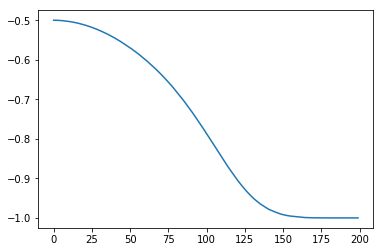

In [0]:
epoch_x = [x for x in range(epochs)]

print(epoch_x)
print(training_loss)
plt.plot(epoch_x,training_loss)

plt.show()

In [0]:
test_output = model.forward(df_tensor_test)
 
outputu = []

In [0]:
for a in test_output:
  if a[0] >= a[1]:
    outputu.append(0)
  else:
    outputu.append(1)

In [0]:
(test_output.type(torch.FloatTensor)).mean()

tensor(1.0000, grad_fn=<MeanBackward0>)

In [0]:
count = 0

df_tensor_y_test = df_tensor_y_test .type(torch.ByteTensor)
for out, act in zip(outputu, df_tensor_y_test):
  if out == act:
    count += 1


print("accuracy_score:", (count/len(df_tensor_y_test))*100)


accuracy_score: 83.95581973030518


#Naive Bayes Implementation

In [0]:
import math
from sklearn.naive_bayes import GaussianNB

In [0]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [0]:
def gaussian(df):
  for a in col_names:
    mean = np.mean(df[a])
    stdd = np.std(df[a])
    df[a] = (1/(stdd*math.sqrt(2*math.pi)))*(np.exp(-(df[a]-mean)**2)/2*(stdd**2))
  return df

In [0]:
df_test_nb_x = df_test_nb.drop('attack', axis = 1)

df_test_nb_y = df_test_nb['attack']

df_train_nb_x = df_train_nb.drop('attack', axis = 1)

df_train_nb_y = df_train_nb['attack']

In [0]:
col_names = ["duration","protocol_type","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate", "last_flag"]

In [0]:
for a in col_names:
  df_test_nb_x[a] = df_test_nb_x[a].apply(sigmoid)
  df_train_nb_x[a] = df_train_nb_x[a].apply(sigmoid)
  

In [0]:
df_test_nb_x.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
0,0.500000,0.731059,0.731059,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.999955,0.509999,0.514996,0.500000,0.500000,0.5,0.5,0.731059,0.731059,1.000000
1,0.500000,0.731059,0.731059,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.731059,0.500000,0.514996,0.500000,0.500000,0.5,0.5,0.731059,0.731059,1.000000
2,0.880797,0.731059,0.880797,1.0,0.5,0.5,0.5,0.5,0.5,0.5,...,1.000000,0.647941,0.509999,0.647941,0.505000,0.5,0.5,0.500000,0.500000,1.000000
3,0.500000,0.952574,0.880797,1.0,0.5,0.5,0.5,0.5,0.5,0.5,...,1.000000,0.731059,0.500000,0.731059,0.569546,0.5,0.5,0.500000,0.500000,1.000000
4,0.731059,0.731059,0.997527,0.5,1.0,0.5,0.5,0.5,0.5,0.5,...,1.000000,0.576885,0.542398,0.507499,0.505000,0.5,0.5,0.696355,0.670401,0.999983


In [0]:
df_train_nb_x.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
0,0.5,0.731059,0.880797,1.0,0.5,0.5,0.5,0.5,0.5,0.5,...,1.000000,0.542398,0.507499,0.542398,0.500000,0.500000,0.500000,0.512497,0.5000,1.0
1,0.5,0.880797,0.880797,1.0,0.5,0.5,0.5,0.5,0.5,0.5,...,0.731059,0.500000,0.645656,0.706822,0.500000,0.500000,0.500000,0.500000,0.5000,1.0
2,0.5,0.731059,0.952574,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,1.000000,0.524979,0.512497,0.500000,0.500000,0.731059,0.731059,0.500000,0.5000,1.0
3,0.5,0.731059,0.880797,1.0,1.0,0.5,0.5,0.5,0.5,0.5,...,1.000000,0.731059,0.500000,0.507499,0.509999,0.507499,0.502500,0.500000,0.5025,1.0
4,0.5,0.731059,0.880797,1.0,1.0,0.5,0.5,0.5,0.5,0.5,...,1.000000,0.731059,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.5000,1.0


In [0]:
gnb = GaussianNB()
gnb.fit(df_train_nb_x, df_train_nb_y)


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
predictions = gnb.predict(df_test_nb_x)

In [0]:
count_new = 0

pred = np.array(predictions)
actual = np.array(df_test_nb_y)

for out, act in zip(pred, df_tensor_y_test):
  if out == act:
    count_new += 1


print("accuracy_score:", (count_new/len(df_test_nb_y))*100)


accuracy_score: 77.57718239886444
